In [1]:
import pandas as pd
import numpy as np
import sklearn.linear_model as lm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("D:/Wine.txt", sep=',')

In [3]:
df.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
Class                            178 non-null int64
 Alcohol                         178 non-null float64
 Malic acid                      178 non-null float64
 Ash                             178 non-null float64
 Alcalinity of ash               178 non-null float64
 Magnesium                       178 non-null int64
 Total phenols                   178 non-null float64
 Flavanoids                      178 non-null float64
 Nonflavanoid phenols            178 non-null float64
 Proanthocyanins                 178 non-null float64
 Color intensity                 178 non-null float64
 Hue                             178 non-null float64
 OD280/OD315 of diluted wines    178 non-null float64
 Proline                         178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


In [5]:
r= np.corrcoef(df[" Alcohol"], df[" Color intensity"])
r

array([[1.       , 0.5463642],
       [0.5463642, 1.       ]])

In [6]:
skm = lm.LinearRegression()
skm.fit(df[[" Alcohol"]], df[" Color intensity"])
print(skm.intercept_, skm.coef_)

-15.225740595669553 [1.56022048]


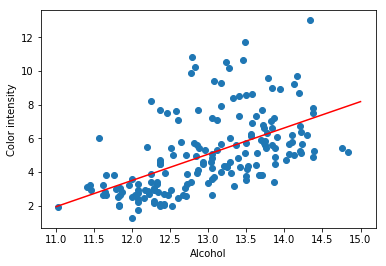

In [7]:
x = []
y =[]
for z in range(11, 16):
    x.append(z)
    y.append(z*skm.coef_+skm.intercept_)
plt.xlabel("Alcohol")
plt.ylabel("Color intensity")
plt.scatter(df[[" Alcohol"]], df[" Color intensity"])
plt.plot(x, y, color = 'red')
plt.show()

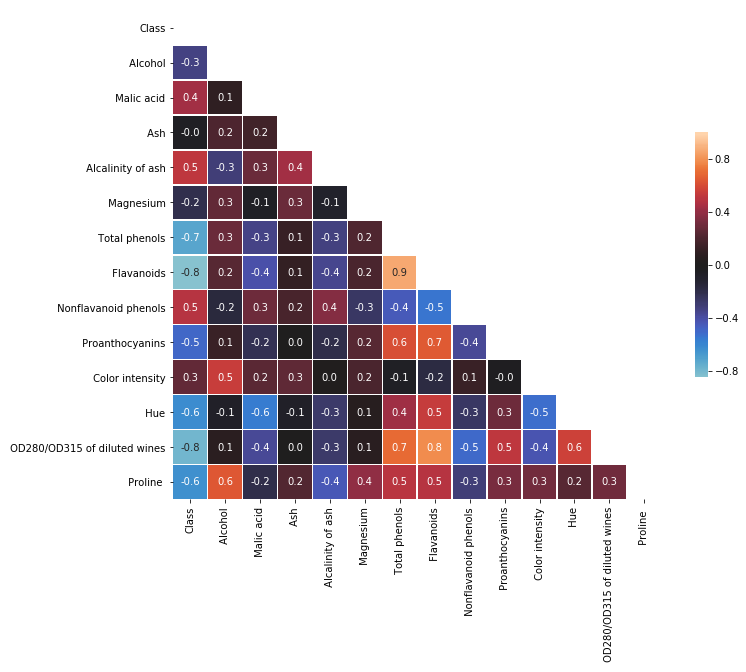

In [8]:


corr = df.corr(method='pearson')

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(12,9))

sns.heatmap(corr, mask=mask, vmax=1, center=0, annot=True, fmt='.1f',
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

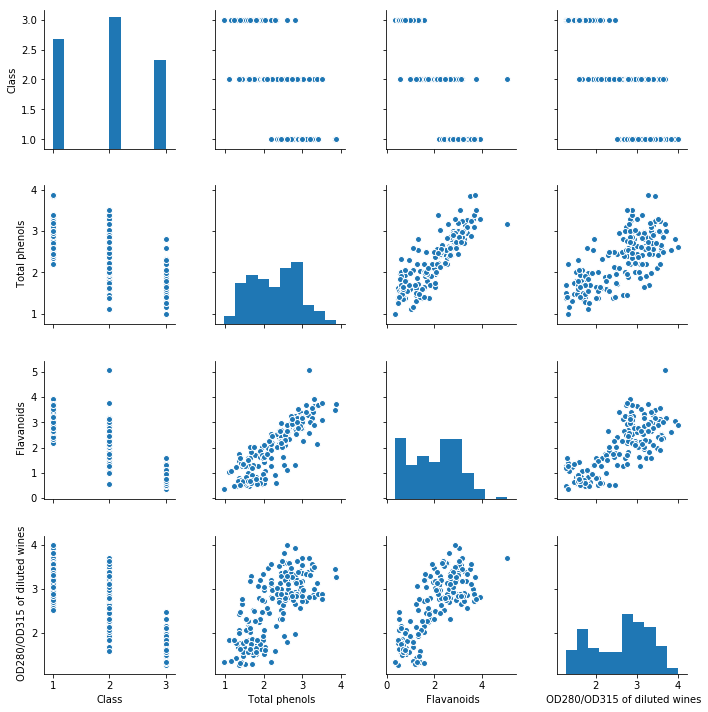

In [9]:
cols = ["Class", " Total phenols", " Flavanoids", " OD280/OD315 of diluted wines"]
sns.pairplot(df[cols])